# Data Component 

Financal Time serise 

Here i am importing data via yfinance.
Installing the yfinance package, which is the downloader connected with the Yahoo Fiannce API.

In [157]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


Below is the package which is a plotting library for the Python programming language and its numerical mathematics extension NumPy.

In [158]:
pip install -U matplotlib

Requirement already up-to-date: matplotlib in c:\users\nisar\anaconda3\lib\site-packages (3.3.3)
Note: you may need to restart the kernel to use updated packages.


Below are the functions.

In [159]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl

below is the data downlolded form yahoo finance of Apple inc. for past one years 

In [160]:
initial_data = yf.download("AAPL", start="2019-12-10", end="2020-12-10")

[*********************100%***********************]  1 of 1 completed


In [161]:
initial_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-10,67.150002,67.517502,66.464996,67.120003,66.004898,90420400
2019-12-11,67.202499,67.775002,67.125000,67.692497,66.567886,78756800
2019-12-12,66.945000,68.139999,66.830002,67.864998,66.737518,137310400
2019-12-13,67.864998,68.824997,67.732498,68.787498,67.644707,133587600
2019-12-16,69.250000,70.197502,69.245003,69.964996,68.802635,128186000


In [162]:
initial_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-03,123.519997,123.779999,122.209999,122.940002,122.940002,78967600
2020-12-04,122.599998,122.860001,121.519997,122.250000,122.250000,78260400
2020-12-07,122.309998,124.570000,122.250000,123.750000,123.750000,86712000
2020-12-08,124.370003,124.980003,123.089996,124.379997,124.379997,82225500
2020-12-09,124.529999,125.949997,121.000000,121.779999,121.779999,114816900


In [163]:
initial_data['Adj Close'].head()

Date
2019-12-10    66.004898
2019-12-11    66.567886
2019-12-12    66.737518
2019-12-13    67.644707
2019-12-16    68.802635
Name: Adj Close, dtype: float64

In [164]:
initial_data['Adj Close'].tail()

Date
2020-12-03    122.940002
2020-12-04    122.250000
2020-12-07    123.750000
2020-12-08    124.379997
2020-12-09    121.779999
Name: Adj Close, dtype: float64

In [165]:
data =  initial_data['Adj Close']


In [166]:
data 

Date
2019-12-10     66.004898
2019-12-11     66.567886
2019-12-12     66.737518
2019-12-13     67.644707
2019-12-16     68.802635
                 ...    
2020-12-03    122.940002
2020-12-04    122.250000
2020-12-07    123.750000
2020-12-08    124.379997
2020-12-09    121.779999
Name: Adj Close, Length: 253, dtype: float64

In [167]:
data.head()

Date
2019-12-10    66.004898
2019-12-11    66.567886
2019-12-12    66.737518
2019-12-13    67.644707
2019-12-16    68.802635
Name: Adj Close, dtype: float64

In [168]:
data.tail()

Date
2020-12-03    122.940002
2020-12-04    122.250000
2020-12-07    123.750000
2020-12-08    124.379997
2020-12-09    121.779999
Name: Adj Close, dtype: float64

array([<AxesSubplot:xlabel='Date'>], dtype=object)

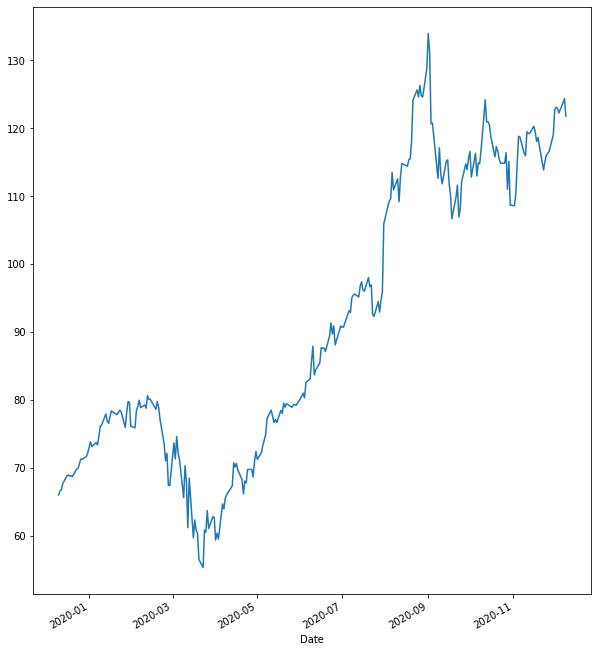

In [169]:
data.plot(figsize=(10, 12), subplots=True)

In the above outputs we can clearly see the last price and the adjusted close price when the market was closed which will give us a good understanding. 


@Summary Statistics

In [170]:
data.describe().round(2)

count    253.00
mean      91.27
std       21.12
min       55.29
25%       73.33
50%       85.45
75%      114.41
max      133.95
Name: Adj Close, dtype: float64

@Changes over Time

In [171]:
data.diff().head()

Date
2019-12-10         NaN
2019-12-11    0.562988
2019-12-12    0.169632
2019-12-13    0.907188
2019-12-16    1.157928
Name: Adj Close, dtype: float64

In [172]:
data.diff().describe().round(2)

count    252.00
mean       0.22
std        2.53
min      -10.50
25%       -0.87
50%        0.18
75%        1.59
max       10.03
Name: Adj Close, dtype: float64

In [173]:
data.pct_change().round(4).head()

Date
2019-12-10       NaN
2019-12-11    0.0085
2019-12-12    0.0025
2019-12-13    0.0136
2019-12-16    0.0171
Name: Adj Close, dtype: float64

As we found the changes over time, now lets find the log return. The main use of the log-return is that is a proxy for the percentage change in the price.

In [174]:
rets = np.log(data / data.shift(1))
rets.head().round(4)

Date
2019-12-10       NaN
2019-12-11    0.0085
2019-12-12    0.0025
2019-12-13    0.0135
2019-12-16    0.0170
Name: Adj Close, dtype: float64

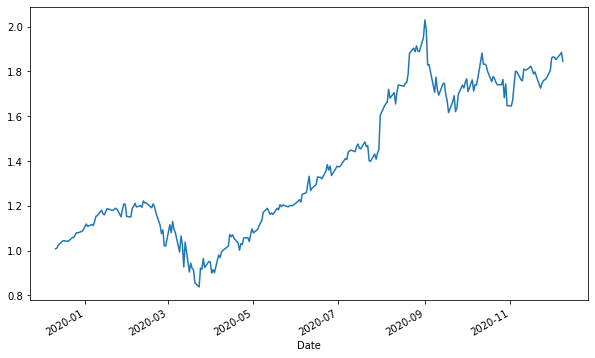

In [175]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

@Resampling is an important operation on financial time series data. Usually this takes the form of downsampling,Where you decrease the frequency of the samples, such as from days to months.

In [176]:
data.resample('1w', label='right').last().head()

Date
2019-12-15    67.644707
2019-12-22    68.699387
2019-12-29    71.246353
2020-01-05    73.122154
2020-01-12    76.293579
Freq: W-SUN, Name: Adj Close, dtype: float64

In [177]:
data.resample('1m', label='right').last().head()

Date
2019-12-31    72.192863
2020-01-31    76.091995
2020-02-29    67.364128
2020-03-31    62.664707
2020-04-30    72.401154
Freq: M, Name: Adj Close, dtype: float64

<AxesSubplot:xlabel='Date'>

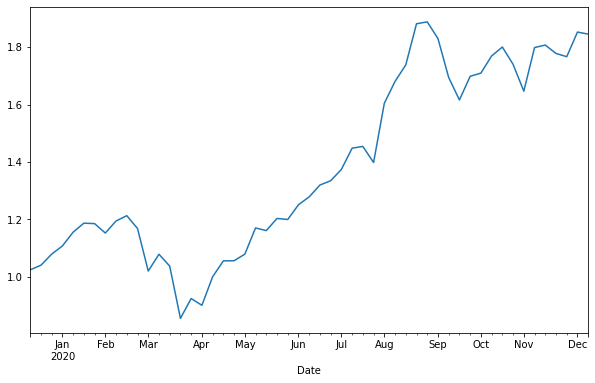

In [178]:
rets.cumsum().apply(np.exp). resample('1w', label='right').last().plot(figsize=(10, 6))

<AxesSubplot:xlabel='Date'>

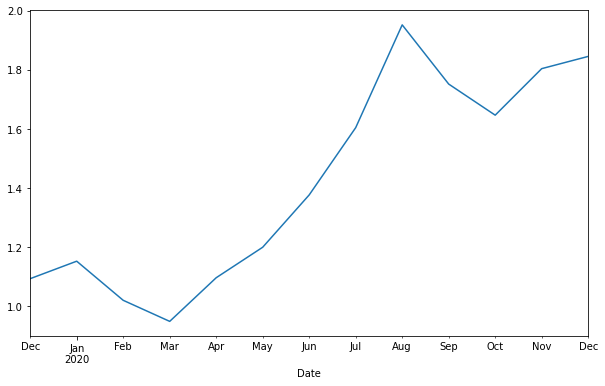

In [179]:
rets.cumsum().apply(np.exp). resample('1m', label='right').last().plot(figsize=(10, 6))

# Rolling Statistics

A rolling average is used to analyze a sequence of data points, often called a moving average and often a running aperture, by generating many averages of various subsets of the total data set.

# Historical Volatility

The historical volatility of Apple, Inc.

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf
import os

In [197]:
AAPL = yf.download("AAPL", start="2019-12-10", end="2020-12-10")

[*********************100%***********************]  1 of 1 completed


In [198]:
S = AAPL['Adj Close'][-1]
print('The spot price is $', round(S,2), '.')

The spot price is $ 121.78 .


In [200]:
log_return = np.log(AAPL['Adj Close'] / AAPL['Adj Close'].shift(1))
vol_h = np.sqrt(252) * log_return.std()
print('The annualised volatility is', round(vol_h*100,2), '%')

The annualised volatility is 46.36 %


In [201]:
log_return = np.log(AAPL['Adj Close'] / AAPL['Adj Close'].shift(1))
vol_h = np.sqrt(252) * log_return[-23:-1].std()
print('The monthly volatility is', round(vol_h*100,2), '%')

The monthly volatility is 22.8 %


# Black-Scholes Model

In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf

In [211]:
def euro_option_bsm(S, K, T, r, q, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value =  - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [217]:
euro_option_bsm(121.78, 70, 1, 0.02, 0.67, 0.46, 'call')

9.01468195118662

In [218]:
T = np.linspace(0.25,3,12)
cpd = np.zeros((len(T),1))
for i in range(len(T)):
    cpd [i] = euro_option_bsm(121.78, 70, T[i], 0.02, 0.67, 0.46, 'call')

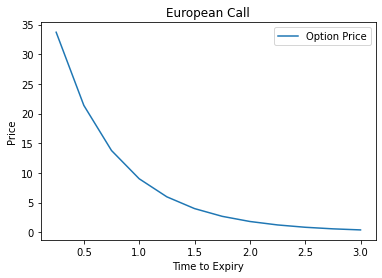

In [219]:
fig = plt.figure()
plt.plot(T, cpd, '-')
plt.xlabel('Time to Expiry')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price'])

In [220]:
euro_option_bsm(121.78, 70, 1, 0.02, 0.67, 0.46, 'put')

15.312718479814354

In [221]:
T = np.linspace(0.25,3,12)
cpd = np.zeros((len(T),1))
for i in range(len(T)):
    cpd [i] = euro_option_bsm(121.78, 70, T[i], 0.02, 0.67, 0.46, 'put')

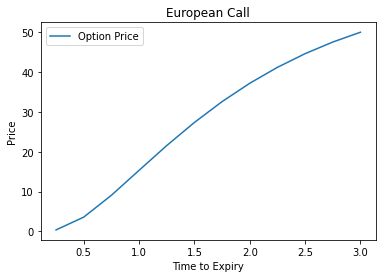

In [222]:
fig = plt.figure()
plt.plot(T, cpd, '-')
plt.xlabel('Time to Expiry')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price'])

# Option Trading

To check weather Black Scholes correctly predicted the market value of the options.

In [224]:
AAPL = yf.Ticker("AAPL")
opt = AAPL.option_chain('2021-09-17')
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL210917C00027500,2020-12-01 14:44:10,27.50,94.17,95.50,96.20,0.000000,0.000000,2,11.0,0.723636,True,REGULAR,USD
1,AAPL210917C00028750,2020-11-27 15:27:21,28.75,88.25,94.25,94.95,0.000000,0.000000,1,1.0,0.703128,True,REGULAR,USD
2,AAPL210917C00030000,2020-10-28 18:13:04,30.00,82.75,86.40,86.95,0.000000,0.000000,2,8.0,0.000010,True,REGULAR,USD
3,AAPL210917C00031250,2020-11-23 15:47:50,31.25,84.20,91.75,92.45,0.000000,0.000000,2,61.0,0.663089,True,REGULAR,USD
4,AAPL210917C00032500,2020-11-06 20:57:12,32.50,86.15,89.40,90.20,0.000000,0.000000,4,25.0,0.000010,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,AAPL210917C00720000,2020-08-28 19:25:09,720.00,26.60,25.80,26.70,-0.449999,-1.663582,11,110.0,1.819520,False,REGULAR,USD
105,AAPL210917C00740000,2020-08-28 15:33:47,740.00,24.50,23.55,24.40,-0.500000,-2.000000,2,NaN,1.777284,False,REGULAR,USD
106,AAPL210917C00800000,2020-08-28 19:17:58,800.00,19.11,18.30,19.10,-0.289999,-1.494840,43,6.0,1.679750,False,REGULAR,USD
107,AAPL210917C00900000,2020-08-27 15:03:20,900.00,13.13,12.85,13.60,-0.570000,-4.160582,25,5.0,1.579592,False,REGULAR,USD


In [225]:
data = yf.download("AAPL", start="2019-12-10", end="2020-12-10")

[*********************100%***********************]  1 of 1 completed


In [226]:
data['Adj Close']

Date
2019-12-10     66.004898
2019-12-11     66.567886
2019-12-12     66.737518
2019-12-13     67.644707
2019-12-16     68.802635
                 ...    
2020-12-03    122.940002
2020-12-04    122.250000
2020-12-07    123.750000
2020-12-08    124.379997
2020-12-09    121.779999
Name: Adj Close, Length: 253, dtype: float64

In [229]:
S = data['Adj Close'][-1]
K = opt.calls['strike']
T = 1
r = 0.02
q = 0.67
log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
vol = np.sqrt(252) * log_return.std() 
vol

0.46357979385965886

In [230]:
AAPL_bsm_call = np.zeros((len(K),1))
for i in range(len(K)):
    AAPL_bsm_call [i] = euro_option_bsm(S, K[i], T, r, q, vol, 'call')

In [231]:

opt.calls['BSMPrice'] = pd.DataFrame(AAPL_bsm_call)
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,BSMPrice
0,AAPL210917C00027500,2020-12-01 14:44:10,27.50,94.17,95.50,96.20,0.000000,0.000000,2,11.0,0.723636,True,REGULAR,USD,3.562100e+01
1,AAPL210917C00028750,2020-11-27 15:27:21,28.75,88.25,94.25,94.95,0.000000,0.000000,1,1.0,0.703128,True,REGULAR,USD,3.447340e+01
2,AAPL210917C00030000,2020-10-28 18:13:04,30.00,82.75,86.40,86.95,0.000000,0.000000,2,8.0,0.000010,True,REGULAR,USD,3.334112e+01
3,AAPL210917C00031250,2020-11-23 15:47:50,31.25,84.20,91.75,92.45,0.000000,0.000000,2,61.0,0.663089,True,REGULAR,USD,3.222560e+01
4,AAPL210917C00032500,2020-11-06 20:57:12,32.50,86.15,89.40,90.20,0.000000,0.000000,4,25.0,0.000010,True,REGULAR,USD,3.112819e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,AAPL210917C00720000,2020-08-28 19:25:09,720.00,26.60,25.80,26.70,-0.449999,-1.663582,11,110.0,1.819520,False,REGULAR,USD,1.397272e-06
105,AAPL210917C00740000,2020-08-28 15:33:47,740.00,24.50,23.55,24.40,-0.500000,-2.000000,2,NaN,1.777284,False,REGULAR,USD,1.016673e-06
106,AAPL210917C00800000,2020-08-28 19:17:58,800.00,19.11,18.30,19.10,-0.289999,-1.494840,43,6.0,1.679750,False,REGULAR,USD,4.040006e-07
107,AAPL210917C00900000,2020-08-27 15:03:20,900.00,13.13,12.85,13.60,-0.570000,-4.160582,25,5.0,1.579592,False,REGULAR,USD,9.523101e-08


In [232]:
opt.calls['BSMPrice'] = pd.DataFrame(AAPL_bsm_call)
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,BSMPrice
0,AAPL210917C00027500,2020-12-01 14:44:10,27.50,94.17,95.50,96.20,0.000000,0.000000,2,11.0,0.723636,True,REGULAR,USD,3.562100e+01
1,AAPL210917C00028750,2020-11-27 15:27:21,28.75,88.25,94.25,94.95,0.000000,0.000000,1,1.0,0.703128,True,REGULAR,USD,3.447340e+01
2,AAPL210917C00030000,2020-10-28 18:13:04,30.00,82.75,86.40,86.95,0.000000,0.000000,2,8.0,0.000010,True,REGULAR,USD,3.334112e+01
3,AAPL210917C00031250,2020-11-23 15:47:50,31.25,84.20,91.75,92.45,0.000000,0.000000,2,61.0,0.663089,True,REGULAR,USD,3.222560e+01
4,AAPL210917C00032500,2020-11-06 20:57:12,32.50,86.15,89.40,90.20,0.000000,0.000000,4,25.0,0.000010,True,REGULAR,USD,3.112819e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,AAPL210917C00720000,2020-08-28 19:25:09,720.00,26.60,25.80,26.70,-0.449999,-1.663582,11,110.0,1.819520,False,REGULAR,USD,1.397272e-06
105,AAPL210917C00740000,2020-08-28 15:33:47,740.00,24.50,23.55,24.40,-0.500000,-2.000000,2,NaN,1.777284,False,REGULAR,USD,1.016673e-06
106,AAPL210917C00800000,2020-08-28 19:17:58,800.00,19.11,18.30,19.10,-0.289999,-1.494840,43,6.0,1.679750,False,REGULAR,USD,4.040006e-07
107,AAPL210917C00900000,2020-08-27 15:03:20,900.00,13.13,12.85,13.60,-0.570000,-4.160582,25,5.0,1.579592,False,REGULAR,USD,9.523101e-08


# Greeks

In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si

# Delta

In the calculation of derivatives, delta is a risk sensitivity measure. It is one of the many acts which a Greek letter denotes. The Greeks are fittingly referred to as the sequence of risk assessments using such letters. Risk controls, hedge thresholds or sensitivities are often often referred to.

In [241]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [244]:
delta(121.78, 70, 1, 0.02, 0.67, 0.46,'call')

0.2600792406223699

In [245]:
delta(121.78, 70, 1, 0.02, 0.67, 0.46,'put')

-0.2516293371641726

In [246]:
S = np.linspace(50,150,11)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 70, 1, 0.02, 0.67, 0.46, 'call')
    Delta_Put [i] = delta(S[i], 70, 1, 0.02, 0.67, 0.46, 'put')

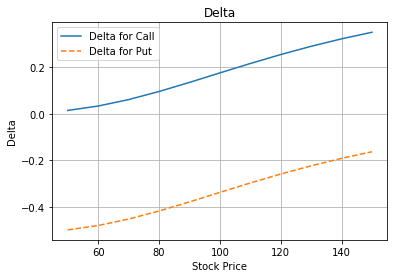

In [247]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call','Delta for Put'])

# Gamma

Gamma is the first delta derivative and is used for calculating an option's price change, relative to its value in or out of the money.

In [248]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(-r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * T)
    
    return gamma

In [249]:
gamma(121.78, 70, 1, 0.02, 0.67, 0.46,'call')

0.006979066731648342

In [250]:
gamma(121.78, 70, 1, 0.02, 0.67, 0.46,'put')

0.006979066731648342

In [251]:
S = np.linspace(50,150,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 121.78, 1, 0.02, 0.67, 0.46, 'call')

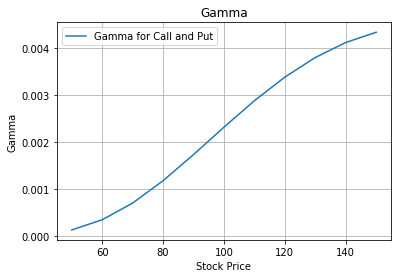

In [252]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call and Put'])

# Theta

The term "theta" refers to the decrease rate in the value of an option as the time passes.

In [254]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [255]:
theta(121.78, 70, 1, 0.02, 0.67, 0.46,'call')

-15.050710534912435

In [256]:
theta(121.78, 70, 1, 0.02, 0.67, 0.46,'put')

-13.895293518251888

In [257]:
T = np.linspace(0.25,3,12)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(121.78, 70, T[i], 0.02, 0.67, 0.46, 'call')
    Theta_Put [i] = theta(121.78, 70, T[i], 0.02, 0.67, 0.46, 'put')

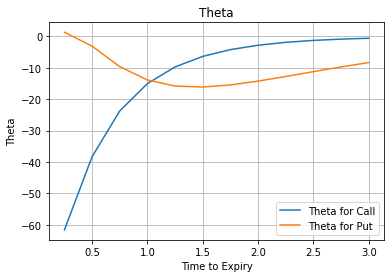

In [258]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call', 'Theta for Put'])

# Rho

Rho is the rate at which the price of changes in derivatives is determined by a change in the risk-free interest rate.

In [260]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [261]:
rho(121.78, 70, 1, 0.02, 0.67, 0.46,'call')

22.657767971805587

In [263]:
rho(121.78, 70, 1, 0.02, 0.67, 0.46,'put')

-45.95613915966729

In [264]:
r = np.linspace(0,0.1,11)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(121.78, 70, 1, r[i], 0.67, 0.46, 'call')
    Rho_Put [i] = rho(121.78, 70, 1, r[i], 0.67, 0.46, 'put')

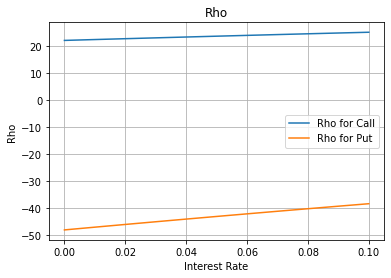

In [265]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call', 'Rho for Put'])

# Vega

Vega is the calculation of the price sensitivity of an option for changes in underlying asset volatility. 

In [266]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [267]:
vega(121.78, 70, 1, 0.02, 0.67, 0.46,'call')

24.855111104592325

In [268]:
vega(121.78, 70, 1, 0.02, 0.67, 0.46,'put')

24.855111104592325

In [269]:
vol = np.linspace(0.1,0.4,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(121.78, 70, 1, 0.02, 0.67, vol[i], 'call')

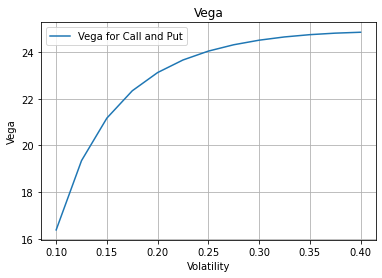

In [270]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Call and Put'])

# Binomial Tree (CRR Tree)

The Binomial Pricing Options system has been widely used because it is capable of handling a range of situations under which other models are difficult to apply. This is primarily because the BOPM is not only based on a single stage, but rather on a definition of the underlying instrument.

In [271]:
import numpy as np
import os

# Data input

The evaluation is carried out iteratively, beginning with each of the final nodes of those reached at expiry, and then reverse through the tree to the first node (valuation date). The value determined at each stage at that point is the value of the option.

In [273]:
S0 = 121.78                 # spot stock price
K = 70                      # strike
T = 1                       # maturity 
r = 0.2                     # risk free rate 
sig = 0.46                  # diffusion coefficient or volatility
N = 3                       # number of periods or number of time steps  
payoff = "call"             # payoff

# Step 1: Creating binomial price tree

The price tree is created from the assessment date to the end.It is assumed that the underlying instrument will shift up or down per stage (in which by definition u ·f1 and 0<d -f1) of the tree by a certain factor (u or d). If S is the current price, it is either S up = S u or S down = S d in the next cycle.

In [274]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor

In [275]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [276]:
S

array([[121.78      , 158.82409388, 207.1365807 , 270.1451777 ],
       [  0.        ,  93.37606176, 121.78      , 158.82409388],
       [  0.        ,   0.        ,  71.59705133,  93.37606176],
       [  0.        ,   0.        ,   0.        ,  54.8977721 ]])

In [278]:
S[0,1]

158.8240938829395

we should look at the above output if the price goes up

In [280]:
S[1,1]

93.37606176384452

We shouldl look at he above output if the prices goes dowm

In [277]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.5622681285067797

In [281]:
q

0.43773187149322035

As we have found our p and q we can now find out our call options

# Step 2: Find option value at each final node

At each final node of the tree-i.e. at expiration of the option-the option value is simply its intrinsic, or exercise, value: Max[(S_n-K),0] for a call option and Max[(K-S_n),0] for a put option, where K is the strike price and S_n is the spot price of the underlying asset at the n-th period.

In [283]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[  0.        ,   0.        ,   0.        , 200.1451777 ],
       [  0.        ,   0.        ,   0.        ,  88.82409388],
       [  0.        ,   0.        ,   0.        ,  23.37606176],
       [  0.        ,   0.        ,   0.        ,   0.        ]])

# Step 3: Find option value at earlier nodes

When this step is done, for each node the value is obtained, beginning at the last time step and working back to the first node in the tree (the date of appraisal), in which the value of the choice is determined.

European Option

In [284]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[ 65.50591384,  97.56196155, 141.65109175, 200.1451777 ],
       [  0.        ,  34.64644093,  56.29451105,  88.82409388],
       [  0.        ,   0.        ,  12.29594317,  23.37606176],
       [  0.        ,   0.        ,   0.        ,   0.        ]])

In [285]:
print('European ' + payoff, str( V[0,0]))

European call 65.5059138431193


American Option

In [287]:
# for American Option
if payoff =="call":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(S[i,j] - K,np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))
elif payoff =="put":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(K - S[i,j],np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))
V


array([[ 65.50591384,  97.56196155, 141.65109175, 200.1451777 ],
       [  0.        ,  34.64644093,  56.29451105,  88.82409388],
       [  0.        ,   0.        ,  12.29594317,  23.37606176],
       [  0.        ,   0.        ,   0.        ,   0.        ]])

In [288]:
print('American ' + payoff, str( V[0,0]))

American call 65.5059138431193


# Monte Carlo Simulation

Monte Carlo simulations are used to model in a method that is not easily predictable due to the intervention of random variables the likelihood of different outcomes. It is a technique used in prediction and forecasting models to consider the effects of risk and uncertainty.

In [290]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [291]:
T = 1
r = 0.2
sigma = 0.46
S0 = 121.78
K = 70

In [292]:
S = mcs_simulation_np(1000)

In [293]:
S = np.transpose(S)
S

array([[121.78      , 122.64373728, 121.1959962 , ..., 258.10777399,
        258.24539897, 255.55955319],
       [121.78      , 120.28003084, 119.75230481, ...,  96.59400639,
         97.81619612,  97.52041485],
       [121.78      , 120.33027086, 122.74394974, ..., 126.06985834,
        125.30108711, 123.98586115],
       ...,
       [121.78      , 118.09884707, 118.66109195, ..., 246.71295161,
        250.15983276, 251.4522219 ],
       [121.78      , 123.12773204, 121.86883367, ..., 439.6891527 ,
        448.40505743, 446.93383256],
       [121.78      , 117.9053917 , 117.8772536 , ...,  72.06017031,
         73.75298021,  73.9148065 ]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

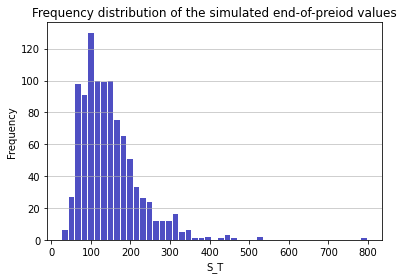

In [294]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [295]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))

European put 0.8863781463792277


In [296]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str(c))

European call 77.90468638870415
